In [1]:
import pandas as pd
import numpy as np
import os
import cv2 as cv

In [2]:
path = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Bangla MNIST/'

In [3]:
train_a = pd.read_csv(path + 'training-a.csv')
print(train_a.shape)
train_a.head()

(19702, 7)


,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [4]:
train_b = pd.read_csv(path + 'training-b.csv')
print(train_b.shape)
train_b.head()

(359, 7)


,filename,original filename,scanid,digit,database name original,contributing team,database name
0,b00000.png,0_0005.png,5,0,B101DB,Shongborton,training-b
1,b00001.png,2_0038.png,38,2,B101DB,Shongborton,training-b
2,b00002.png,5_0037.png,37,5,B101DB,Shongborton,training-b
3,b00003.png,2_0039.png,39,2,B101DB,Shongborton,training-b
4,b00004.png,5_0028.png,28,5,B101DB,Shongborton,training-b


In [5]:
train_c = pd.read_csv(path + 'training-c.csv')
print(train_c.shape)
train_c.head()

(24298, 7)


,filename,original filename,scanid,digit,database name original,contributing team,database name
0,c00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c
1,c00001.png,Scan_29_digit_1_num_1.png,29,1,OngkoDB,Buet_Backpropers,training-c
2,c00002.png,Scan_131_digit_3_num_1.png,131,3,OngkoDB,Buet_Backpropers,training-c
3,c00003.png,Scan_160_digit_2_num_2.png,160,2,OngkoDB,Buet_Backpropers,training-c
4,c00004.png,Scan_202_digit_7_num_0.png,202,7,OngkoDB,Buet_Backpropers,training-c


In [6]:
train_d = pd.read_csv(path + 'training-d.csv')
print(train_d.shape)
train_d.head()

(10908, 7)


,original filename,scanid,digit,num,database name original,database name,filename
0,Scan_17_digit_1_num_3.png,17,1,3,DUISRT,training-d,d00000.png
1,Scan_112_digit_1_num_0.png,112,1,0,DUISRT,training-d,d00001.png
2,Scan_81_digit_5_num_8.png,81,5,8,DUISRT,training-d,d00002.png
3,Scan_5_digit_7_num_1.png,5,7,1,DUISRT,training-d,d00003.png
4,Scan_5_digit_0_num_6.png,5,0,6,DUISRT,training-d,d00004.png


In [7]:
train_e = pd.read_csv(path + 'training-e.csv')
print(train_e.shape)
train_e.head()

(16778, 11)


,filename,original filename,districtid,institutionid,gender,age,datestamp,scanid,digit,database name original,database name
0,e00000.png,02_0002_1_20_1016_1248_60.png,2,2,1,20,1016,1248,9,BanglaLekha-Isolated,training-e
1,e00001.png,02_0002_0_19_1016_1183_60.png,2,2,0,19,1016,1183,9,BanglaLekha-Isolated,training-e
2,e00002.png,01_0001_0_16_0916_0464_51.png,1,1,0,16,916,464,0,BanglaLekha-Isolated,training-e
3,e00003.png,02_0002_0_24_1016_1464_55.png,2,2,0,24,1016,1464,4,BanglaLekha-Isolated,training-e
4,e00004.png,02_0002_0_18_1016_1718_56.png,2,2,0,18,1016,1718,5,BanglaLekha-Isolated,training-e


In [8]:
images = []
labels = []

def load_data(database):

    for i in range(len(database['filename'])):

        image_path = path + database['database name'][i] + '/' + database['filename'][i]

        image = cv.imread(image_path)
        if image is None:
            continue
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (32, 32))
        image = image.astype('float32')/255.0

        label = database['digit'][i]

        images.append(image)
        labels.append(label)

    return images, labels

In [9]:
images, labels = load_data(train_a)

In [10]:
images, labels = load_data(train_b)

In [11]:
images, labels = load_data(train_c)

In [12]:
images, labels = load_data(train_d)

In [13]:
images, labels = load_data(train_e)

In [14]:
len(images)

72045

In [15]:
images_r = np.array(images)
labels_r = np.array(labels)

In [16]:
images_r.shape, labels_r.shape

((72045, 32, 32), (72045,))

In [17]:
images_r = images_r.reshape((images_r.shape[0], 32, 32, 1))

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(images_r, labels_r, test_size=0.15, random_state=10)

In [20]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)


print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(61238, 32, 32, 1) (10807, 32, 32, 1) (61238, 10) (10807, 10)


In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(Input((32, 32, 1)))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       5

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(X_train, Y_train_req, validation_split=0.1, epochs=20, batch_size=64, callbacks=[callback])

Train on 55114 samples, validate on 6124 samples
Epoch 1/20
55114/55114 [==============================] - 53s 965us/sample - loss: 0.7356 - accuracy: 0.7407 - val_loss: 1.3000 - val_accuracy: 0.7089
Epoch 2/20
55114/55114 [==============================] - 57s 1ms/sample - loss: 0.1589 - accuracy: 0.9545 - val_loss: 0.1457 - val_accuracy: 0.9574
Epoch 3/20
55114/55114 [==============================] - 60s 1ms/sample - loss: 0.1202 - accuracy: 0.9678 - val_loss: 0.1413 - val_accuracy: 0.9611
Epoch 4/20
55114/55114 [==============================] - 60s 1ms/sample - loss: 0.0960 - accuracy: 0.9744 - val_loss: 0.1422 - val_accuracy: 0.9610
Epoch 5/20
55114/55114 [==============================] - 61s 1ms/sample - loss: 0.0791 - accuracy: 0.9794 - val_loss: 0.1091 - val_accuracy: 0.9716
Epoch 6/20
55114/55114 [==============================] - 62s 1ms/sample - loss: 0.0721 - accuracy: 0.9811 - val_loss: 0.1102 - val_accuracy: 0.9732
Epoch 7/20
55114/55114 [==============================]

In [26]:
import matplotlib.pyplot as plt

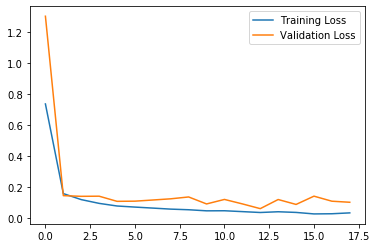

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

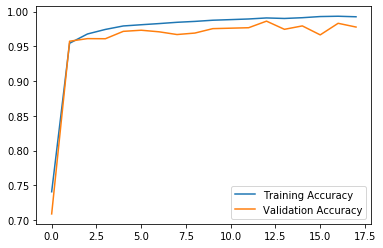

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [29]:
model.evaluate(X_test, Y_test_req, batch_size=64)

10807/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.128120942712947, 0.97742206]

In [31]:
predictions = model.predict_classes(X_test)
predictions

array([5, 6, 9, ..., 2, 1, 4], dtype=int64)

[[1023    3    0   18    7   26    0    1    0    0]
 [   3 1087    1    0    5    3    0    0    0   31]
 [   0    4 1035    2    5    0    0    3    1    3]
 [   2    0    0 1050    0    2    2    0    2    1]
 [   1    0    0    0 1094    7    0    0    0    0]
 [   3    0    0    4    8 1088    4    0    0    0]
 [   0    0    2   12    0   11 1046    0    0    0]
 [   0    0    0    0    6    2    0 1038    0    0]
 [   1    1    0    4   28    3    0    0 1045    0]
 [   0   16    1    0    4    0    0    1    0 1057]]


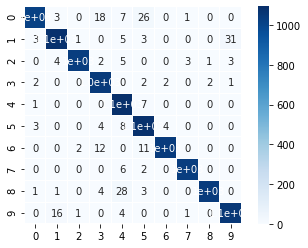

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, predictions)
print(cm)

heatmap = sns.heatmap(cm, annot=True, square=True, linewidths=0.1, cmap='Blues')
plt.show(heatmap)

In [33]:
model.save('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/Saved Models/Bangla MNIST/Bangla MNIST.h5')

In [ ]:
function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)